In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
warnings.filterwarnings("ignore")

#### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
 

In [3]:
Company = pd.read_csv("C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Assignment/Decision Trees/Company_Data.csv")

In [4]:
Company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
Company.isnull().value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age    Education  Urban  US   
False  False      False   False        False       False  False      False  False      False  False    400
dtype: int64

In [6]:
Company.duplicated().value_counts()

False    400
dtype: int64

In [8]:
# Creating dummies
le = preprocessing.LabelEncoder()
Company["Urban"] = le.fit_transform(Company["Urban"])
Company["US"] = le.fit_transform(Company["US"])
Company["ShelveLoc"] = le.fit_transform(Company["ShelveLoc"])

In [9]:
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [10]:
array = Company.values

In [11]:
Company1 = Company.drop(["ShelveLoc"], axis = 1)

In [12]:
array1 = Company1.values

In [13]:
x = array1[:, :]
y = array[:, 6]

In [32]:
 y = y.astype(int)

In [38]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

##### C5.0

In [39]:
# Building decision tree classifier using entropy
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

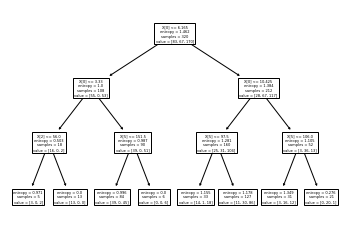

In [40]:
#PLot the decision tree
tree.plot_tree(model);

[Text(0.5, 0.875, 'Sales <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [83, 67, 170]\nclass = 3'),
 Text(0.25, 0.625, 'Sales <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [55, 0, 53]\nclass = 1'),
 Text(0.125, 0.375, 'Income <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [16, 0, 2]\nclass = 1'),
 Text(0.0625, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 0, 2]\nclass = 1'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]\nclass = 1'),
 Text(0.375, 0.375, 'Price <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [39, 0, 51]\nclass = 3'),
 Text(0.3125, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [39, 0, 45]\nclass = 3'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]\nclass = 3'),
 Text(0.75, 0.625, 'Sales <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [28, 67, 117]\nclass = 3'),
 Text(0.625, 0.375, 'Price <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [25, 31, 104]\nclass = 3'),
 Text(0.5625, 0.125, 'entropy = 1.155\nsamples = 

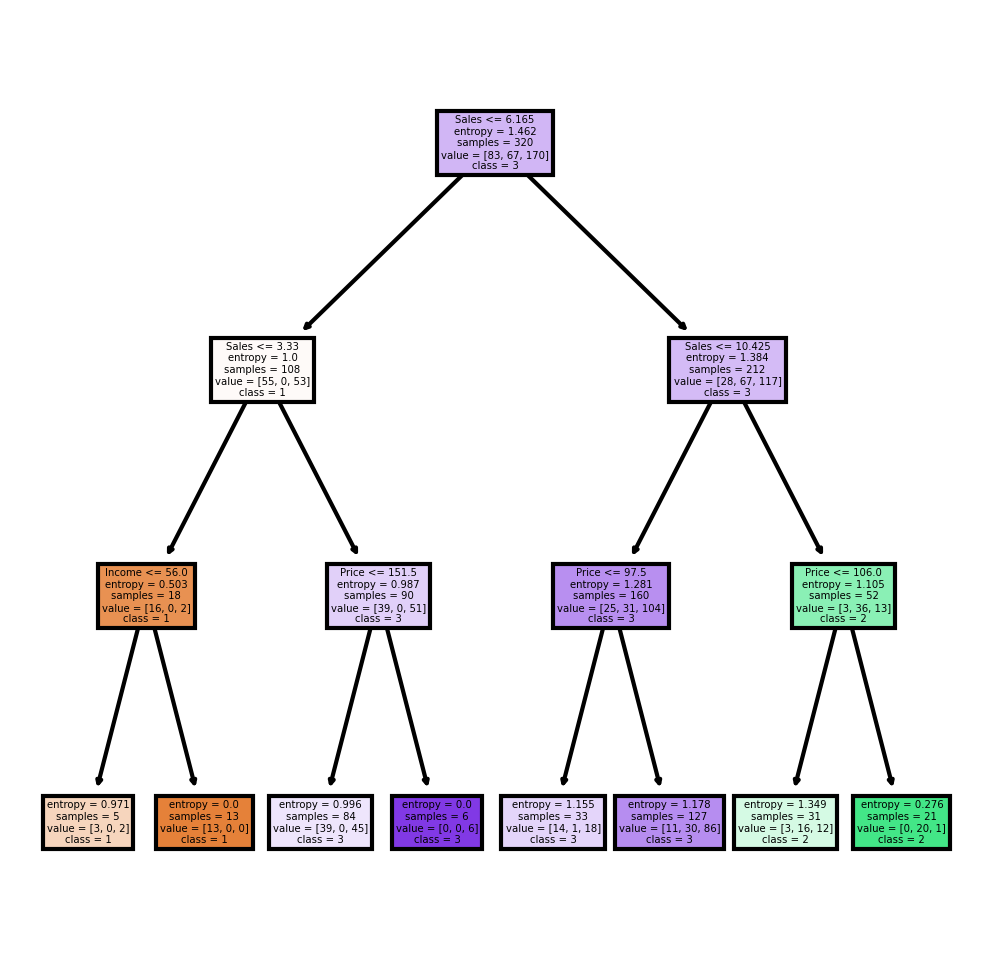

In [47]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price', 'Age', 'Education', 'Urban', 'US']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [48]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    63
1    13
0     4
dtype: int64

In [49]:
pd.crosstab(y_test,preds)

col_0,0,1,2
row_0,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [50]:
# Accuracy 
np.mean(preds==y_test)

0.625

##### CART 

In [51]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [52]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

#### Problem Statement:
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [53]:
Fraud = pd.read_csv("C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Assignment/Decision Trees/Fraud_check.csv")

In [54]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [55]:
Fraud = Fraud.rename({"Marital.Status" : "MaritalStat", "Taxable.Income" : "TaxIn", "City.Population" : "CityPop", "Work.Experience" : "WorkExp"}, axis = 1)

In [56]:
Fraud

,Undergrad,MaritalStat,TaxIn,CityPop,WorkExp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [57]:
# Creating dummies
le = preprocessing.LabelEncoder()
Fraud["Undergrad"] = le.fit_transform(Fraud["Undergrad"])
Fraud["MaritalStat"] = le.fit_transform(Fraud["MaritalStat"])
Fraud["Urban"] = le.fit_transform(Fraud["Urban"])

In [58]:
Fraud

,Undergrad,MaritalStat,TaxIn,CityPop,WorkExp,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [59]:
# Categorizing numerical column - TaxIn
bins = [0, 30000, Fraud["TaxIn"].max()]
category = ['Risky', 'Good' ]
Fraud['TaxIn_g'] = pd.cut(Fraud['TaxIn'], bins, labels=category)

In [60]:
Fraud

,Undergrad,MaritalStat,TaxIn,CityPop,WorkExp,Urban,TaxIn_g
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [61]:
Fraud = Fraud.drop(["TaxIn"], axis = 1)

In [62]:
array = Fraud.values

In [63]:
x = array[:, : 5]
y = array[:, 5]

In [64]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

##### C5.0

In [65]:
# Building decision tree classifier using entropy
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

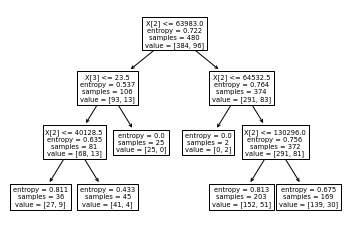

In [66]:
#PLot the decision tree
tree.plot_tree(model);

[Text(0.5, 0.875, 'Income <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]\nclass = 1'),
 Text(0.3, 0.625, 'Advertising <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]\nclass = 1'),
 Text(0.2, 0.375, 'Income <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]\nclass = 1'),
 Text(0.1, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]\nclass = 1'),
 Text(0.3, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]\nclass = 1'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = 1'),
 Text(0.7, 0.625, 'Income <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]\nclass = 1'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 2'),
 Text(0.8, 0.375, 'Income <= 130296.0\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]\nclass = 1'),
 Text(0.7, 0.125, 'entropy = 0.813\nsamples = 203\nvalue = [152, 51]\nclass = 1'),
 Text(0.9, 0.125, 'entropy = 0.675\nsamples = 169\nvalue = [139, 30]\nclass = 1')]

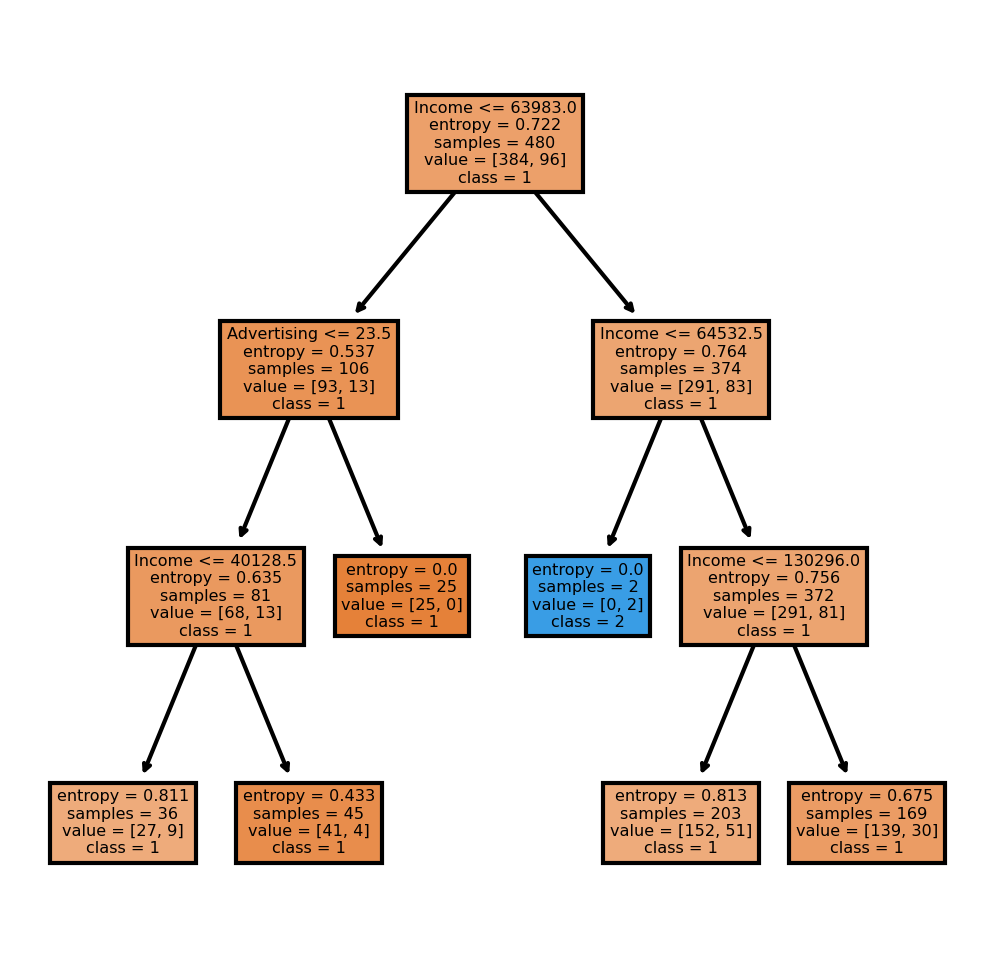

In [67]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price', 'Age', 'Education', 'Urban', 'US']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [68]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

Good    120
dtype: int64

In [69]:
pd.crosstab(y_test,preds)

col_0,Good
row_0,
Good,92
Risky,28


In [71]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

##### CART

In [72]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667